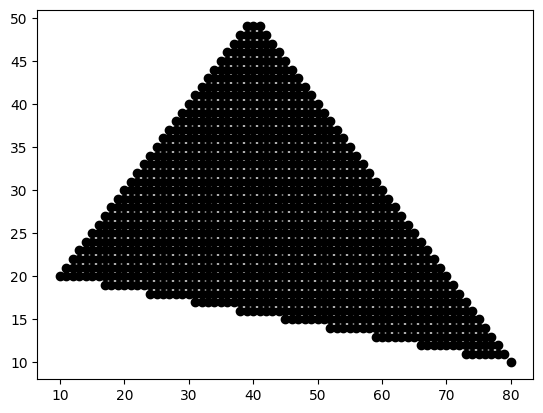

In [1]:
import matplotlib.pyplot as plt

plot_pixel_x = []
plot_pixel_y = []

class Edge:
    def __init__(self, x1, y1, x2, y2):
        if y1 < y2:
            self.y_start, self.y_end = y1, y2
            self.x_start, self.x_end = x1, x2
        else:
            self.y_start, self.y_end = y2, y1
            self.x_start, self.x_end = x2, x1

        self.current_x = self.x_start
        self.inverse_slope = (self.x_end - self.x_start) / (self.y_end - self.y_start)

def plot_pixel(x, y):
    # Function to plot a pixel at coordinates (x, y)
    # plt.scatter(x, y, color='black')
    plot_pixel_x.append(x)
    plot_pixel_y.append(y)


def draw_scanline(y, edges):
    # Sort edges by x-coordinate
    edges.sort(key=lambda edge: edge.current_x)

    # Fill pixels between pairs of edges
    for i in range(0, len(edges), 2):
        x_start = int(edges[i].current_x)
        x_end = int(edges[i + 1].current_x)

        for x in range(x_start, x_end + 1):
            plot_pixel(x, y)

    # Update x-coordinates for the next scanline
    for edge in edges:
        edge.current_x += edge.inverse_slope

def scanline_fill(polygon):
    # Create a list of edges from the polygon
    edges = [Edge(x1, y1, x2, y2) for (x1, y1, x2, y2) in polygon]

    # Find the minimum and maximum y-coordinates to determine the scanline range
    min_y = min(edge.y_start for edge in edges)
    max_y = max(edge.y_end for edge in edges)

    # Process each scanline
    for y in range(min_y, max_y + 1):
        active_edges = [edge for edge in edges if edge.y_start <= y < edge.y_end]
        draw_scanline(y, active_edges)

# Example usage:
polygon = [(10, 20, 40, 50), (40, 50, 80, 10), (80, 10, 10, 20)]
scanline_fill(polygon)

plt.scatter(plot_pixel_x, plot_pixel_y, color='black')
plt.show()
